In [83]:
#MIDTERM 3 12/2/2021
#Nicholas Engebretsen
#Couldn't get default notebook to work
#Heres my code...


In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [85]:
#import data
df = pd.read_csv("sensors_train.csv")

x_train = df[["Sensor_1","Sensor_2","Sensor_3","Sensor_4"]]
y_train = df[["Status"]]
df.head()

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Status
0,14.161,14.255,13.657,58.989,Yellow
1,21.341,20.094,14.489,70.697,Red
2,21.674,20.433,13.804,69.272,Green
3,15.834,15.591,18.119,75.727,Red
4,12.898,13.186,8.127,42.537,Red


In [86]:
df2 = pd.read_csv("sensors_test.csv")

x_test= df2[["Sensor_1","Sensor_2","Sensor_3","Sensor_4"]]
y_test = df2[["Status"]]
df2.head(5)
#df2.sort_values(by = 'Sensor_1',ascending = False)

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Status
0,15.032,14.914,10.720,53.631,Red
1,24.523,22.736,17.234,87.234,Green
2,10.902,11.672,9.285,42.817,Red
3,29.898,26.869,5.843,56.183,Green
4,18.379,17.732,9.397,49.869,Red


In [87]:
#training Accuracy score
model = DecisionTreeClassifier(max_depth=15, random_state=42)
model.fit(x_train, y_train)
trainingAcc = model.score(x_train, y_train)
testingAcc = model.score(x_test,y_test)
print("training Acc:", trainingAcc)
print("testing Acc:", testingAcc)

training Acc: 0.88625
testing Acc: 0.6125


In [88]:
model.feature_importances_

array([0.43061892, 0.12836297, 0.27171336, 0.16930475])

Text(0.5, 0, 'max_depth')

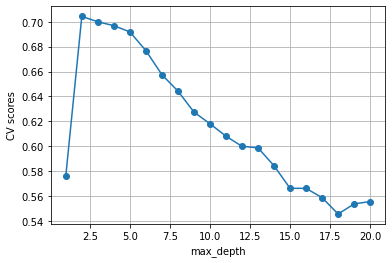

In [89]:
scores = []
for depth in range(1, 21):
    dtree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores.append(cross_val_score(dtree, x_train, y_train, cv=5).mean())
    
S = pd.Series(scores, index = range(1,21))
ax = S.plot(style = 'o-', grid=True)
ax.set_ylabel('CV scores')
ax.set_xlabel('max_depth')


In [90]:
best_depth = S.idxmax()
print('Best max_depth = ', best_depth )

Best max_depth =  2


In [91]:
# retrain the data using maxDepth =2
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(x_train, y_train)
trainingAcc = model.score(x_train, y_train)
testingAcc = model.score(x_test,y_test)
print("training Acc:", trainingAcc)
print("testing Acc:", testingAcc)

training Acc: 0.706875
testing Acc: 0.7125


In [92]:
df_train = pd.read_csv('sensors_train.csv')
df_test = pd.read_csv('sensors_test.csv')
Xr_train = df_train.loc[:,['Sensor_1','Sensor_2', 'Sensor_3']]
yr_train = df_train['Sensor_4']


In [93]:
lin_model = LinearRegression()
lin_model.fit(Xr_train, yr_train)
#lin_model.intercept_
lin_model.coef_


array([ 2.141181  , -1.17779325,  3.00670267])

In [94]:
lin_model.score(Xr_train,yr_train)

0.9597076468309549